# Análise de dados simples sobre venda de café de uma máquina

O projeto está sendo feito para aprendizado.
A base possui registros de vendas de café no período de março a junho do ano de 2024.
O Database está disponível em: https://www.kaggle.com/datasets/ihelon/coffee-sales/data?select=index.csv

In [1]:
#Importar blibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import warnings

warnings.filterwarnings('ignore')

In [2]:
#Ler arquivo
dados = pd.read_csv("index.csv")

In [3]:
#Ver os 10 primeiros registro da base
dados.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [4]:
#Tamanho da nossa base de dados
dados.shape

(896, 6)

In [5]:
#Informações dos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         896 non-null    object 
 1   datetime     896 non-null    object 
 2   cash_type    896 non-null    object 
 3   card         807 non-null    object 
 4   money        896 non-null    float64
 5   coffee_name  896 non-null    object 
dtypes: float64(1), object(5)
memory usage: 42.1+ KB


In [6]:
#Colunas date e datetime estão no formato object temos que fazer a conversão para trabalhar com estes dados
dados['date'] = pd.to_datetime(dados['date'])
dados['datetime'] = pd.to_datetime(dados['datetime'])

In [7]:
dados["mes"] = dados["date"].dt.to_period("M")
dados["semana"] = dados["date"].dt.to_period("W")
dados["hora"] = dados["datetime"].dt.hour

In [8]:
#descrição dos dados
dados.describe()

,money,hora
count,896.000000,896.000000
mean,34.143906,14.651786
std,4.573951,3.868994
min,23.020000,7.000000
25%,28.900000,11.000000
50%,34.500000,14.000000
75%,37.720000,18.000000
max,40.000000,22.000000


Fazendo essas analises observamos que o dinheiro é referente sobre cada venda

In [9]:
#Ver Quantidade total vendida nesses meses pela maquina
totalVendas = sum(dados['money'])
print(totalVendas)

30592.940000000035


In [10]:
#Quantidade recebida em dinheiro e cartão
recDin = dados[dados['cash_type'] == 'cash']['money'].sum()
recCar = dados[dados['cash_type'] == 'card']['money'].sum()

print(f'Total em dinheiro = {recDin}\nTotal no cartão = {recCar}')

Total em dinheiro = 3186.0
Total no cartão = 27406.94


In [11]:
#Porcentagem de vendas em cartao e dinheiro
print(dados['cash_type'].value_counts(normalize=True) * 100)

card    90.066964
cash     9.933036
Name: cash_type, dtype: float64


Text(0, 0.5, 'Quantidade de vendas')

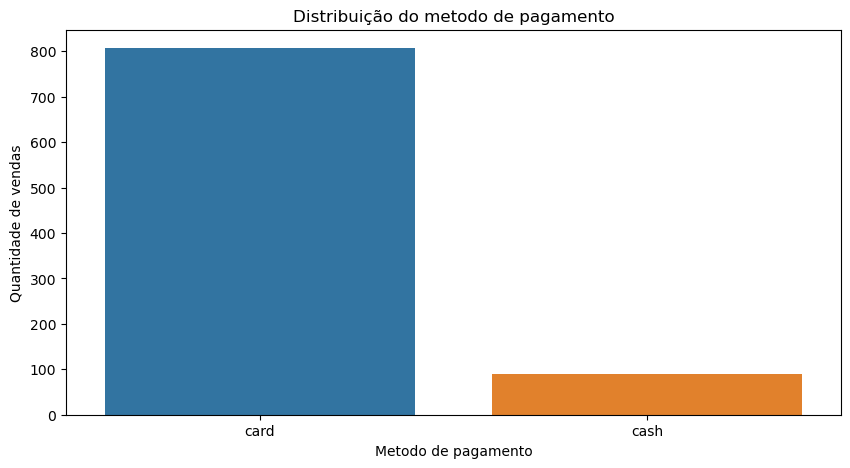

In [12]:
#Grafico demonstrando a distribuição do meio de pagamento
plt.figure( figsize=(10,5) )
plt.title('Distribuição do metodo de pagamento')
sn.countplot(x=dados['cash_type'])
plt.xlabel('Metodo de pagamento')
plt.ylabel('Quantidade de vendas')

Conseguimos observar que a maioria do público tem preferencia pelo pagamento em cartão, sendo mais de 90%.

In [13]:
#Total de tipos de café vendido em %

dados['coffee_name'].value_counts(normalize= True)*100

Americano with Milk    22.656250
Latte                  20.870536
Cappuccino             18.303571
Americano              14.843750
Cortado                 9.486607
Hot Chocolate           7.031250
Espresso                3.906250
Cocoa                   2.901786
Name: coffee_name, dtype: float64

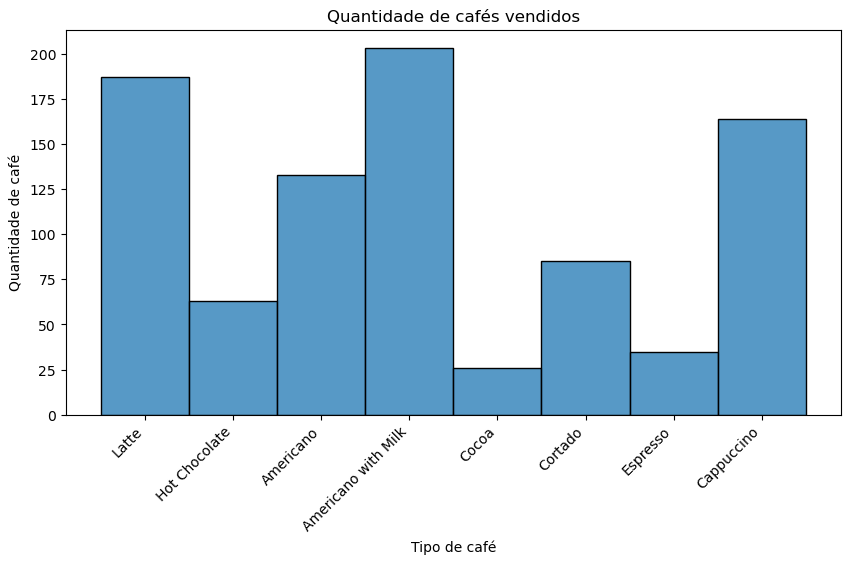

In [14]:
plt.figure(figsize=(10,5))
plt.title('Quantidade de cafés vendidos')
sn.histplot(data=dados, x= 'coffee_name')
plt.xlabel('Tipo de café')
plt.ylabel('Quantidade de café')
plt.xticks( rotation=45, ha='right' );

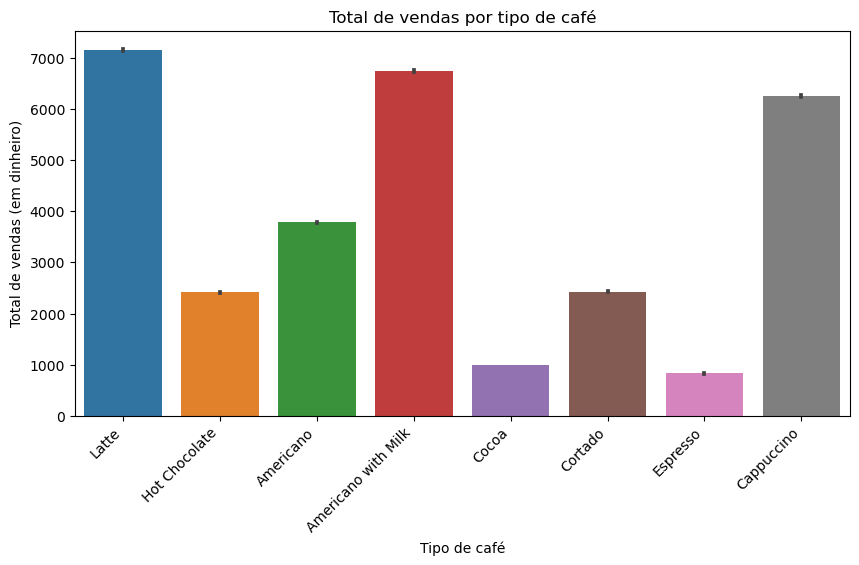

In [15]:
plt.figure(figsize=(10,5))
sn.barplot(data= dados, x= 'coffee_name', y= 'money', estimator= sum)
plt.title('Total de vendas por tipo de café')
plt.xlabel('Tipo de café')
plt.ylabel('Total de vendas (em dinheiro)')
plt.xticks( rotation=45, ha='right' );


Por esses dois últimos gráficos, observamos que os cafés que lideram as vendas em quantidade são os mesmos que têm a maior quantidade de dinheiro arrecadada.
Mas apesar de o "Americano wirh Milk" aparecer mais nas vendas, o "Latte" teve um faturamento melhor, isso deve-se ao valor de venda dele ser maior, apesar de aparecer em segundo na quantidade de vendas.

Text(0, 0.5, 'Quantidade de vendas')

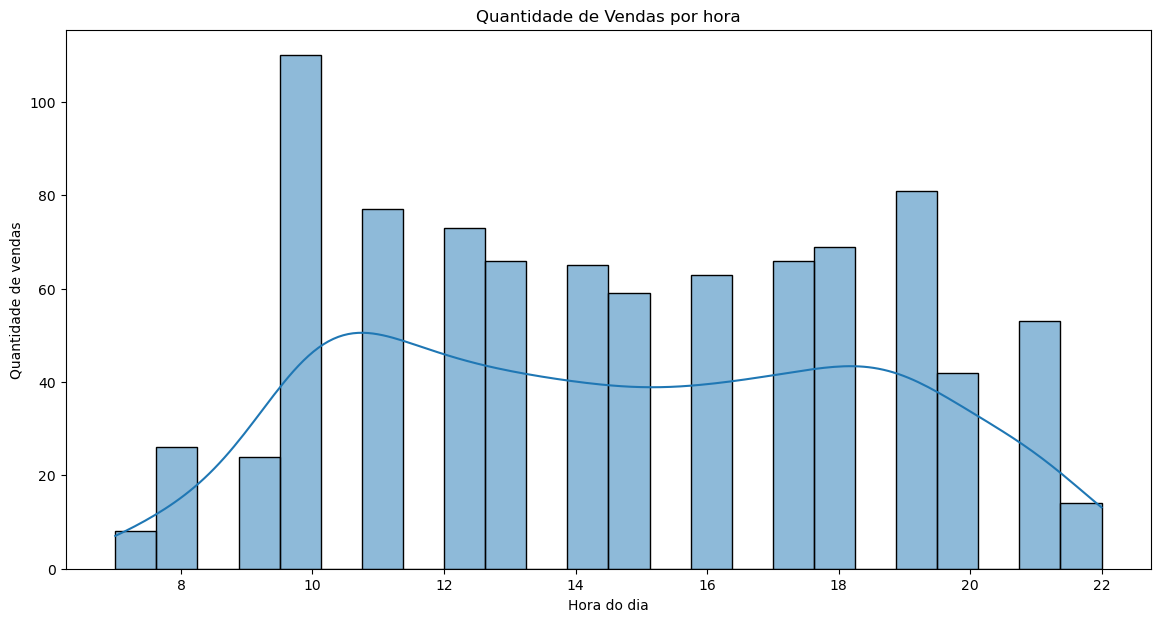

In [16]:
#Quantidade de vendas por hora
plt.figure(figsize=(14, 7))
sn.histplot(data=dados, x='hora', kde=True, bins=24)
plt.title('Quantidade de Vendas por hora')
plt.xlabel('Hora do dia')
plt.ylabel('Quantidade de vendas')

Observa-se um consumo baixo referente aos horários da noite e madrugada na máquina.

Text(0, 0.5, 'Quantidade Vendida')

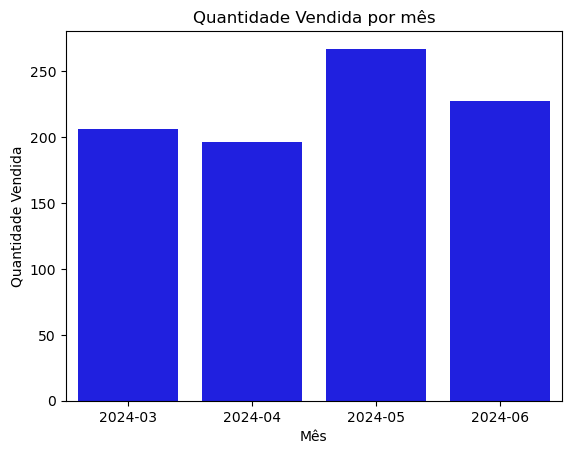

In [17]:
venda_mes = dados.groupby(by=['mes'])['money'].sum()

plt.title('Quantidade Vendida por mês')
sn.countplot(x=dados['mes'], color='#0000ff')
plt.xlabel('Mês')
plt.ylabel('Quantidade Vendida')

Ao fim desta análise, observa-se que o consumo de café por mês é perto ou maiores que 200 quantidades, observamos preferencia por 3 tipos de café, não havendo muita relação com o preço final do produto.  As vendas não ocorrem muito no final da noite e início da madrugada justamente pelo tipo de produto vendido.